Learning pytorch and an experiment on denoising autoencoders

In [1]:
import numpy as np
import torch
import torchvision
import time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
x = torch.rand(5, 5, 5)
print(x)

tensor([[[0.3686, 0.4137, 0.4620, 0.5548, 0.9061],
         [0.9565, 0.7600, 0.7523, 0.6103, 0.9009],
         [0.1548, 0.8854, 0.9694, 0.5675, 0.5036],
         [0.2580, 0.4390, 0.5583, 0.3861, 0.0864],
         [0.6476, 0.7712, 0.8084, 0.9750, 0.7844]],

        [[0.9043, 0.3513, 0.5989, 0.7622, 0.1394],
         [0.4372, 0.2649, 0.0557, 0.2791, 0.9522],
         [0.2231, 0.9392, 0.8689, 0.9826, 0.6329],
         [0.9808, 0.9599, 0.6188, 0.5319, 0.6604],
         [0.2487, 0.6015, 0.3674, 0.8622, 0.1532]],

        [[0.6467, 0.2085, 0.4745, 0.9227, 0.0658],
         [0.4432, 0.1299, 0.2646, 0.7239, 0.4092],
         [0.5613, 0.9190, 0.8288, 0.7517, 0.0344],
         [0.9021, 0.0998, 0.1854, 0.9885, 0.9552],
         [0.6464, 0.7281, 0.8556, 0.0849, 0.0614]],

        [[0.7756, 0.0035, 0.2323, 0.0901, 0.6325],
         [0.1452, 0.7946, 0.8524, 0.2291, 0.0374],
         [0.7708, 0.1428, 0.2647, 0.1356, 0.0707],
         [0.7984, 0.2290, 0.5820, 0.1514, 0.4054],
         [0.4048, 0.4240,

In [5]:
x.size()

torch.Size([5, 5, 5])

In [6]:
x.view([-1, 5])

tensor([[0.3000, 0.0210, 0.8710, 0.5552, 0.9482],
        [0.2811, 0.7825, 0.3574, 0.4456, 0.5085],
        [0.0207, 0.1845, 0.1318, 0.1385, 0.0191],
        [0.6576, 0.9688, 0.0794, 0.6047, 0.8560],
        [0.1410, 0.4178, 0.6317, 0.1815, 0.3526],
        [0.5689, 0.2904, 0.7580, 0.0463, 0.2372],
        [0.4719, 0.3142, 0.1094, 0.9083, 0.8728],
        [0.1724, 0.0254, 0.6684, 0.8099, 0.8835],
        [0.9916, 0.9341, 0.0269, 0.0042, 0.3970],
        [0.8719, 0.1148, 0.0102, 0.6787, 0.0249],
        [0.9064, 0.7817, 0.3404, 0.6689, 0.1033],
        [0.5208, 0.6700, 0.4030, 0.3707, 0.1618],
        [0.1223, 0.0552, 0.7338, 0.8261, 0.6486],
        [0.8522, 0.3554, 0.0835, 0.2575, 0.3160],
        [0.6597, 0.5491, 0.5451, 0.7546, 0.2171],
        [0.0855, 0.6388, 0.6713, 0.7549, 0.3723],
        [0.9430, 0.9047, 0.7433, 0.8827, 0.1861],
        [0.9990, 0.1268, 0.5106, 0.6171, 0.8684],
        [0.8130, 0.6549, 0.2901, 0.3076, 0.4009],
        [0.3773, 0.4786, 0.9814, 0.1294, 0.2874],


In [8]:
c = np.zeros((5, 10))
d = torch.from_numpy(c)
print(d)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)


In [9]:
torch.cuda.is_available()

True

In [34]:
device = torch.device("cuda")

In [30]:
n = 10000
m = 1000
d = m
p = 1000
x = np.random.rand(n, m)
y = np.random.rand(d, p)

In [41]:
t0 = time.perf_counter()
for i in range(10):
    z = np.matmul(x, y)
t1 = time.perf_counter()
avg = (t1 - t0)/10
print('avg time = {:.3f} ms'.format(avg*1e3))

avg time = 213.556 ms


In [35]:
xc = torch.from_numpy(x)
xc = xc.to(device)
yc = torch.from_numpy(y)
yc = yc.to(device)

In [43]:
t0 = time.perf_counter()
for i in range(10):
    z = torch.matmul(xc, yc)
t1 = time.perf_counter()
avg = (t1 - t0)/10
print('avg time = {:.3f} ms'.format(avg*1e3))

avg time = 0.210 ms


In [77]:
x = torch.rand(5, 1, device = device, requires_grad = True)
y = x**2
z = y.mean()

In [78]:
z.backward()

In [79]:
x.grad

tensor([[0.0079],
        [0.3794],
        [0.0136],
        [0.1987],
        [0.3667]], device='cuda:0')

In [4]:
x = torch.randn((4,32,16,16))
tconv = nn.ConvTranspose2d(32, 16, 3, padding = (1, 1))
y = tconv(x)
print(y.shape)

torch.Size([4, 16, 16, 16])


In [62]:
class DAE(nn.Module):
    
    def __init__(self):
        super(DAE, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=(1, 1))
        self.pool1 = nn.MaxPool2d(2, return_indices=True)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1, 1))
        self.tconv1 = nn.ConvTranspose2d(32, 32, 3, padding = (1, 1))
        self.unpool1 = nn.MaxUnpool2d((2, 2))
        self.tconv2 = nn.ConvTranspose2d(32, 1, 3, padding = (1, 1))
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x, indices = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = F.relu(self.tconv1(x))
        x = self.unpool1(x, indices)
        x = F.relu(self.tconv2(x))
        return x
        

In [85]:
transform = transforms.Compose(
    [transforms.ToTensor()])

In [86]:
train_dataset = torchvision.datasets.MNIST(root = './', 
                                           train = True,
                                           download = True,
                                           transform = transform)

In [87]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset,
                                     batch_size=batch_size,
                                     shuffle=True,
                                     num_workers=2,
                                     pin_memory=True)

In [104]:
model = DAE()
device = torch.device("cuda")
model.to(device)

DAE(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (tconv1): ConvTranspose2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (unpool1): MaxUnpool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
  (tconv2): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [105]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9, weight_decay = 0)

In [106]:
train_loss = []
n_epochs = 5
eps = 0.1
for e in range(n_epochs):
    for i, batch in enumerate(train_loader):
        data, labels = batch
        labels = data[:]
        data = data + eps*torch.randn_like(data)
        data = data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        out = model(data)

        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        loss_val = loss.item()
        train_loss.append(loss_val)

        if i % 100 == 0:
            print('epoch = {}, iter = {}, loss = {}'.format(e, i, loss_val))
    

epoch = 0, iter = 0, loss = 0.1060137003660202
epoch = 0, iter = 100, loss = 0.10570366680622101
epoch = 0, iter = 200, loss = 0.09019365161657333
epoch = 0, iter = 300, loss = 0.09244218468666077
epoch = 0, iter = 400, loss = 0.08206967264413834
epoch = 0, iter = 500, loss = 0.08347464352846146
epoch = 0, iter = 600, loss = 0.06980297714471817
epoch = 0, iter = 700, loss = 0.07513720542192459
epoch = 0, iter = 800, loss = 0.06402046978473663
epoch = 0, iter = 900, loss = 0.06384697556495667
epoch = 0, iter = 1000, loss = 0.057631779462099075
epoch = 0, iter = 1100, loss = 0.05752367526292801
epoch = 0, iter = 1200, loss = 0.052765969187021255
epoch = 0, iter = 1300, loss = 0.05028824508190155
epoch = 0, iter = 1400, loss = 0.051780816167593
epoch = 0, iter = 1500, loss = 0.04883857071399689
epoch = 0, iter = 1600, loss = 0.04740605503320694
epoch = 0, iter = 1700, loss = 0.05006725341081619
epoch = 0, iter = 1800, loss = 0.0431852862238884
epoch = 1, iter = 0, loss = 0.044768746942281

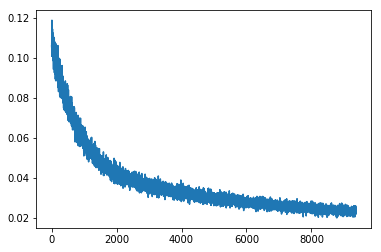

In [107]:
plt.figure()
plt.plot(train_loss)

In [11]:
data, labels = next(iter(train_loader))

In [108]:
data = data.to(device)
out = model(data)
out = out.cpu().detach().numpy()
out.shape

(32, 1, 28, 28)

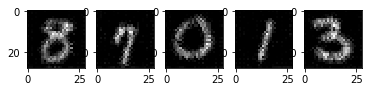

In [109]:
n = 5
for i in range(n):
    img = out[i]
    img = np.reshape(img, (28, 28))
    plt.subplot(1, n, i + 1)
    plt.imshow(img, cmap = 'gray')

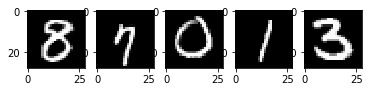

In [110]:
n = 5
for i in range(n):
    img = labels[i].cpu().detach().numpy()
    img = np.reshape(img, (28, 28))
    plt.subplot(1, n, i + 1)
    plt.imshow(img, cmap = 'gray')

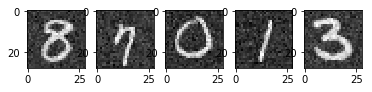

In [111]:
n = 5
for i in range(n):
    img = data[i].cpu().detach().numpy()
    img = np.reshape(img, (28, 28))
    plt.subplot(1, n, i + 1)
    plt.imshow(img, cmap = 'gray')